In [1]:
import os
import librosa
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler


# de fragmenten worden in dataframe gezet en in lijsten gezet
df = pd.read_csv('Data/fragments_data.csv')
audio_files = df['fragment'].tolist()
labels = df['labels'].tolist()


X = []
y = []

for file, label in zip(audio_files, labels):
    y_val, sr = librosa.load("audio_fragments/" + file, sr=None)  # laad audio
    mfcc = librosa.feature.mfcc(y=y_val, sr=sr, n_mfcc=13)  
    mfcc_mean = np.mean(mfcc.T, axis=0)
    chroma = librosa.feature.chroma_stft(y=y_val, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)  
    features = np.concatenate([mfcc_mean, chroma_mean])
    X.append(features)  # combineer MFCCs en chroma
    y.append(label)

# x en y overzetten naar numpy arrays
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Voorspelling
y_pred = model.predict(X_test)
print("Nauwkeurigheid o.b.v. MFCC en Chromas:", accuracy_score(y_test, y_pred))


c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1872
  warnings.warn(
c:\Users\Gijs Minn

Nauwkeurigheid o.b.v. MFCC en Chromas: 0.5800256081946222


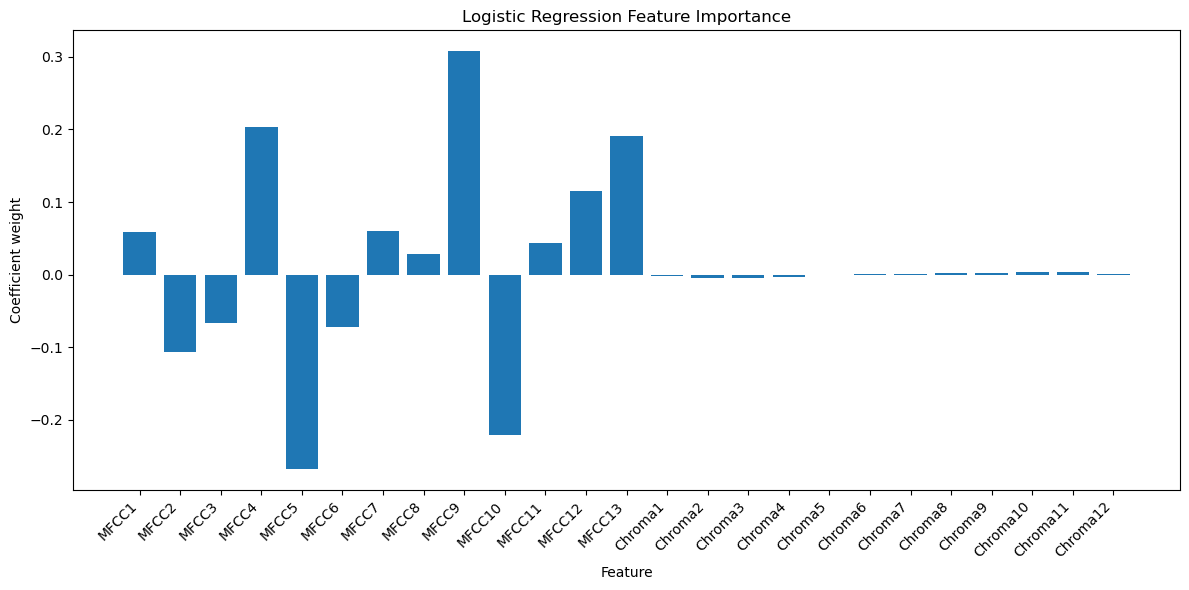

In [3]:
import matplotlib.pyplot as plt

# coefficienten ophalen
coeffs = model.coef_[0]

# Bouw labels: MFCC1…MFCC13 + Chroma1…Chroma12 (of langer, afhankelijk van jouw chroma-dimensie)
n_mfcc = 13
n_chroma = coeffs.shape[0] - n_mfcc
feature_labels = [f"MFCC{i+1}" for i in range(n_mfcc)] + [f"Chroma{i+1}" for i in range(n_chroma)]

# Plot de balkjes
plt.figure(figsize=(12, 6))
plt.bar(range(len(coeffs)), coeffs)
plt.xticks(range(len(coeffs)), feature_labels, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Coefficient weight")
plt.title("Logistic Regression Feature Importance")
plt.tight_layout()
plt.show()


<Figure size 1500x1500 with 0 Axes>

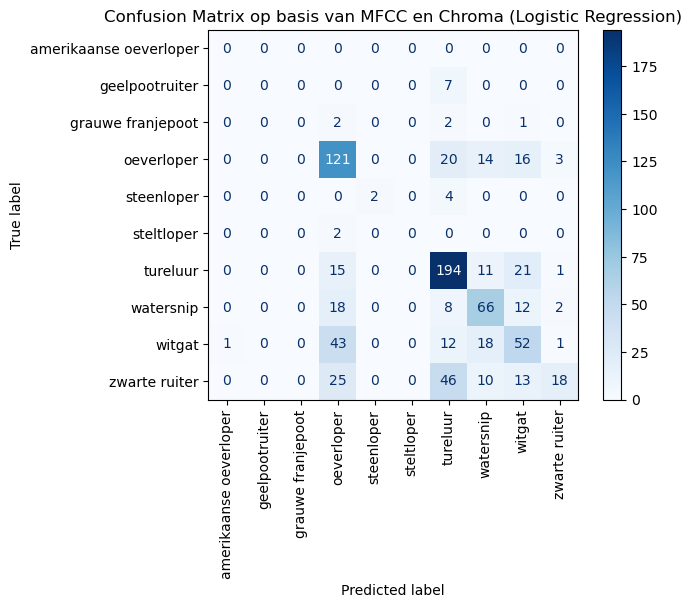

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

# Plot
plt.figure(figsize=(15, 15))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix op basis van MFCC en Chroma (Logistic Regression)')
plt.xticks(rotation=90)
plt.show()

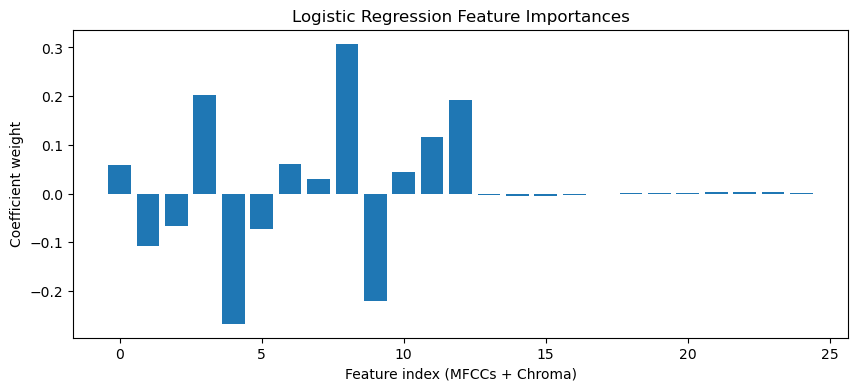

In [20]:
import matplotlib.pyplot as plt

# Coëfficiënten van het model
coef = model.coef_[0]

plt.figure(figsize=(10, 4))
plt.bar(range(len(coef)), coef)
plt.xlabel('Feature index (MFCCs + Chroma)')
plt.ylabel('Coefficient weight')
plt.title('Logistic Regression Feature Importances')
plt.show()

c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


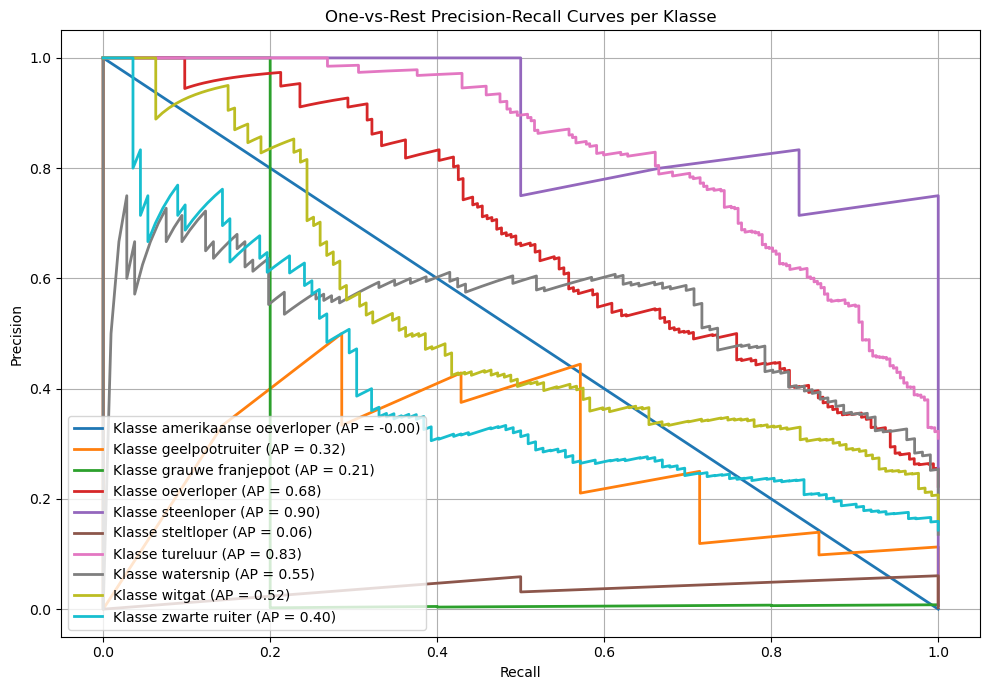

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Zet labels om naar binair formaat (One-vs-Rest)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)

# Gemiddelde precision per klasse
plt.figure(figsize=(10, 7))

for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Klasse {classes[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('One-vs-Rest Precision-Recall Curves per Klasse')
plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
plt.show()


c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1872
  warnings.warn(
c:\Users\Gijs Minn

Epoch 1/30, Loss: 1.4817
Epoch 2/30, Loss: 1.1750
Epoch 3/30, Loss: 1.0461
Epoch 4/30, Loss: 0.9820
Epoch 5/30, Loss: 0.9197
Epoch 6/30, Loss: 0.8716
Epoch 7/30, Loss: 0.8304
Epoch 8/30, Loss: 0.7952
Epoch 9/30, Loss: 0.7688
Epoch 10/30, Loss: 0.7378
Epoch 11/30, Loss: 0.7154
Epoch 12/30, Loss: 0.6951
Epoch 13/30, Loss: 0.6622
Epoch 14/30, Loss: 0.6488
Epoch 15/30, Loss: 0.6252
Epoch 16/30, Loss: 0.6030
Epoch 17/30, Loss: 0.5779
Epoch 18/30, Loss: 0.5778
Epoch 19/30, Loss: 0.5699
Epoch 20/30, Loss: 0.5449
Epoch 21/30, Loss: 0.5406
Epoch 22/30, Loss: 0.5207
Epoch 23/30, Loss: 0.4926
Epoch 24/30, Loss: 0.4974
Epoch 25/30, Loss: 0.4943
Epoch 26/30, Loss: 0.4628
Epoch 27/30, Loss: 0.4664
Epoch 28/30, Loss: 0.4525
Epoch 29/30, Loss: 0.4520
Epoch 30/30, Loss: 0.4324

Test Accuracy: 0.8374


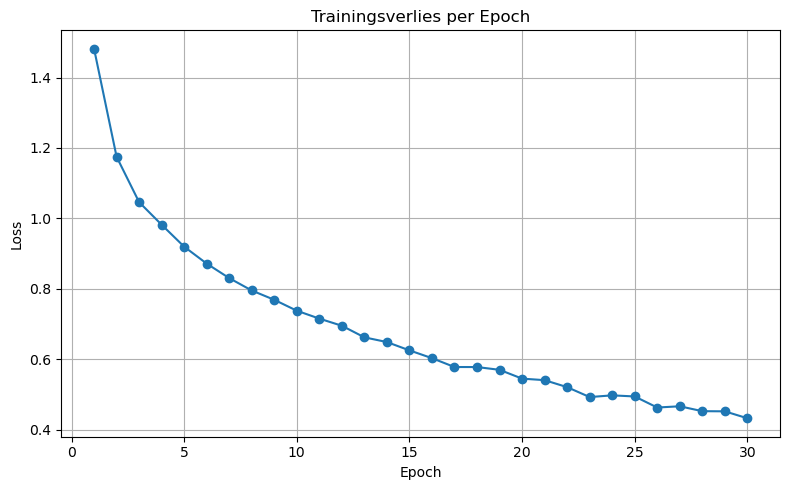

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt

# ===== Data voorbereiden =====
df = pd.read_csv('Data/fragments_data.csv')
audio_files = df['fragment'].tolist()
labels = df['labels'].tolist()

X = []
y = []

for file, label in zip(audio_files, labels):
    y_val, sr = librosa.load("audio_fragments/" + file, sr=None)
    mfcc = librosa.feature.mfcc(y=y_val, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    chroma = librosa.feature.chroma_stft(y=y_val, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)
    features = np.concatenate([mfcc_mean, chroma_mean])
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Normaliseren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Datasets
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# ===== Model bouwen =====
class StrongAudioNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = StrongAudioNet(input_dim=X.shape[1], num_classes=len(le.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ===== Trainen =====
losses = []
epochs = 30

for epoch in range(epochs):
    total_loss = 0
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# ===== Evalueren =====
model.eval()
with torch.no_grad():
    y_pred = torch.argmax(model(X_test), dim=1)
    accuracy = (y_pred == y_test).float().mean().item()
    print(f"\nTest Accuracy: {accuracy:.4f}")

# ===== Plot van de loss =====
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), losses, marker='o')
plt.title('Trainingsverlies per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()
    

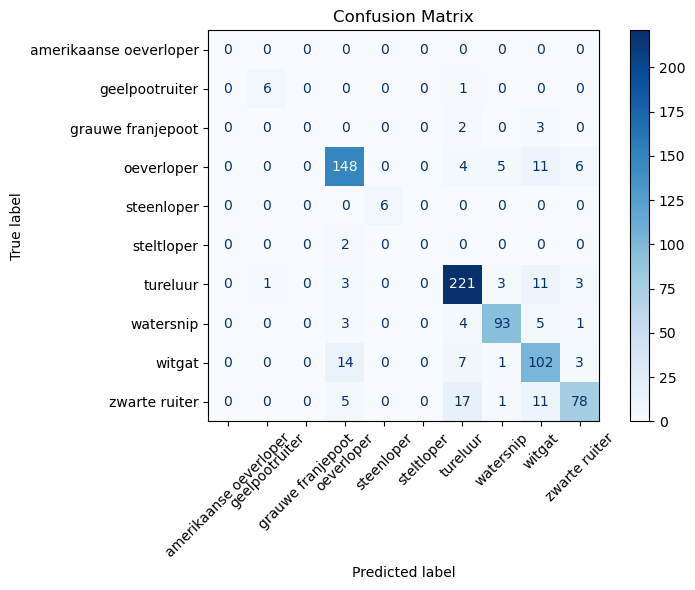

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Zorg dat alle klassen worden weergegeven, ook als ze niet in y_test zitten
all_labels = np.arange(len(le.classes_))
cm = confusion_matrix(y_test.numpy(), y_pred.numpy(), labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)  # kwartslag
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [5]:
from sklearn.metrics import classification_report

# Print uitgebreide statistieken
report = classification_report(
	y_test.numpy(),
	y_pred.numpy(),
	labels=all_labels,
	target_names=le.classes_
)
print("🔍 Classification Report:\n")
print(report)

🔍 Classification Report:

                        precision    recall  f1-score   support

amerikaanse oeverloper       0.00      0.00      0.00         0
        geelpootruiter       0.86      0.86      0.86         7
     grauwe franjepoot       0.00      0.00      0.00         5
            oeverloper       0.85      0.85      0.85       174
            steenloper       1.00      1.00      1.00         6
            steltloper       0.00      0.00      0.00         2
              tureluur       0.86      0.91      0.89       242
             watersnip       0.90      0.88      0.89       106
                witgat       0.71      0.80      0.76       127
         zwarte ruiter       0.86      0.70      0.77       112

              accuracy                           0.84       781
             macro avg       0.60      0.60      0.60       781
          weighted avg       0.83      0.84      0.83       781



c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gijs Minnen\an

In [6]:
# Toon verkeerde voorspellingen
wrong_indices = (y_pred != y_test).nonzero().flatten()
print(f"\nAantal fouten: {len(wrong_indices)}")

print("\n Fouten:")
for idx in wrong_indices[:10]:  # max 10 tonen
    true_label = le.inverse_transform([y_test[idx].item()])[0]
    pred_label = le.inverse_transform([y_pred[idx].item()])[0]
    print(f"Index {idx.item()}: Echt = {true_label}, Voorspeld = {pred_label}")


Aantal fouten: 127

 Fouten:
Index 1: Echt = oeverloper, Voorspeld = tureluur
Index 11: Echt = zwarte ruiter, Voorspeld = witgat
Index 20: Echt = zwarte ruiter, Voorspeld = witgat
Index 27: Echt = zwarte ruiter, Voorspeld = witgat
Index 28: Echt = watersnip, Voorspeld = witgat
Index 36: Echt = witgat, Voorspeld = zwarte ruiter
Index 37: Echt = witgat, Voorspeld = tureluur
Index 38: Echt = zwarte ruiter, Voorspeld = witgat
Index 40: Echt = tureluur, Voorspeld = watersnip
Index 44: Echt = oeverloper, Voorspeld = watersnip


In [8]:
def predict_audio(filepath):
    y_val, sr = librosa.load(filepath, sr=None)
    mfcc = librosa.feature.mfcc(y=y_val, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    chroma = librosa.feature.chroma_stft(y=y_val, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)
    features = np.concatenate([mfcc_mean, chroma_mean]).reshape(1, -1)

    # Normaliseren met dezelfde scaler
    features_scaled = scaler.transform(features)
    features_tensor = torch.tensor(features_scaled, dtype=torch.float32)

    # Voorspellen
    model.eval()
    with torch.no_grad():
        output = model(features_tensor)
        pred_class = torch.argmax(output, dim=1).item()
        label = le.inverse_transform([pred_class])[0]
        print(f"\n🔮 Voorspelling voor '{filepath}': {label}")

# Voorspel live
predict_audio("audio_fragments/XC993494-Oeverloper,-flight-call,-IGS,-290425,-0257-uur_fragment_4.wav")


🔮 Voorspelling voor 'audio_fragments/XC993494-Oeverloper,-flight-call,-IGS,-290425,-0257-uur_fragment_4.wav': oeverloper


### Visualisatie Neural Networks

In [9]:
from torchsummary import summary

# Voorbeeld: input vector van 25 features (13 MFCC + 12 chroma)
summary(model, input_size=(25,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]           6,656
              ReLU-2                  [-1, 256]               0
           Dropout-3                  [-1, 256]               0
            Linear-4                  [-1, 128]          32,896
              ReLU-5                  [-1, 128]               0
           Dropout-6                  [-1, 128]               0
            Linear-7                   [-1, 10]           1,290
Total params: 40,842
Trainable params: 40,842
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.16
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


In [10]:
%pip install graphviz torchviz

import os
from torchviz import make_dot
import torch

# Controleer of Graphviz 'dot' executable in PATH zit
dot_found = any(
	os.access(os.path.join(path, 'dot.exe'), os.X_OK)
	for path in os.environ["PATH"].split(os.pathsep)
)
if not dot_found:
	print("⚠️ Graphviz 'dot' executable niet gevonden in PATH. Download Graphviz van https://graphviz.gitlab.io/download/ en voeg de installatie-map toe aan je PATH.")

# Dummy input (zelfde dimensie als trainingsdata)
dummy_input = torch.randn(1, 25)

# Forward pass
output = model(dummy_input)

# Visualiseer het rekenpad
dot = make_dot(output, params=dict(model.named_parameters()))
dot.format = 'png'
if dot_found:
	dot.render("neural_network_visual")  # maakt neural_network_visual.png aan
else:
	print("⏭️ Sla renderen over omdat 'dot' niet gevonden is.")

Note: you may need to restart the kernel to use updated packages.


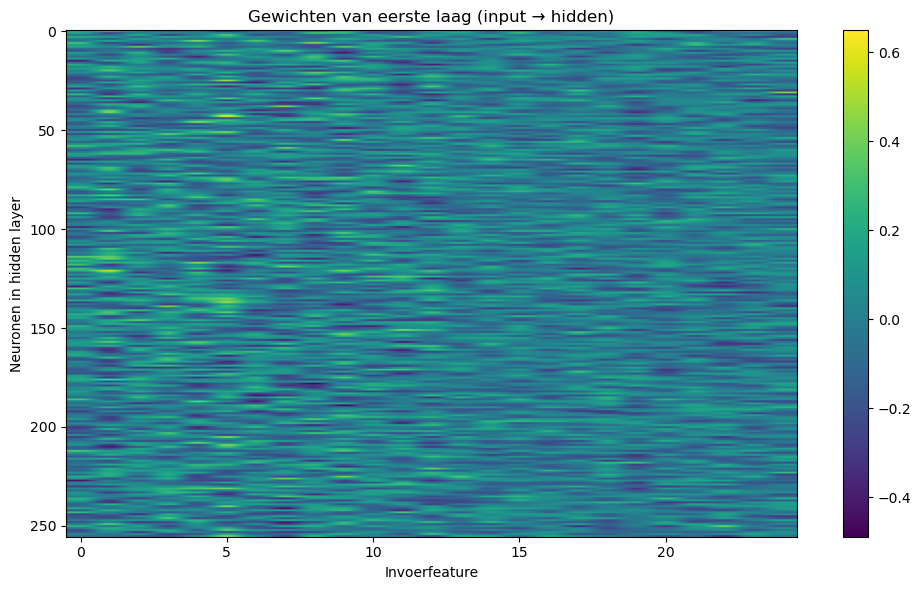

In [ ]:
import matplotlib.pyplot as plt

# Neem de gewichten van de eerste lineaire laag
weights = model.model[0].weight.data.numpy()

plt.figure(figsize=(10, 6))
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Gewichten van eerste laag (input → hidden)")
plt.xlabel("Invoerfeature")
plt.ylabel("Neuronen in hidden layer")
plt.tight_layout()
plt.show()

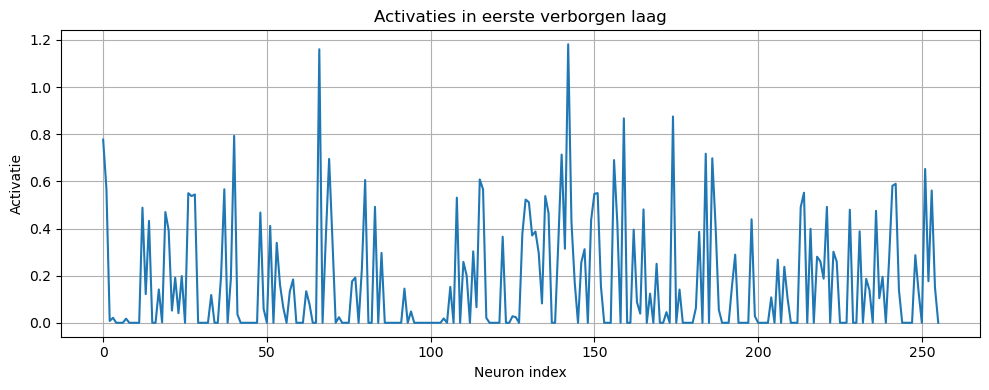

In [12]:
# Hook om activaties op te slaan
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Koppel aan de 1e ReLU-laag (aannemende dat model[1] een ReLU is)
model.model[1].register_forward_hook(get_activation("relu1"))

# Run een voorbeeldinput door het model
sample = torch.tensor(X_scaled[0], dtype=torch.float32).unsqueeze(0)  # batch-size van 1
model(sample)

# Visualiseer de activatie
plt.figure(figsize=(10, 4))
plt.plot(activations["relu1"].squeeze().numpy())
plt.title("Activaties in eerste verborgen laag")
plt.xlabel("Neuron index")
plt.ylabel("Activatie")
plt.grid(True)
plt.tight_layout()
plt.show()